In [4]:
import pandas as pd
dataset=pd.read_csv("income.csv")
dataset.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


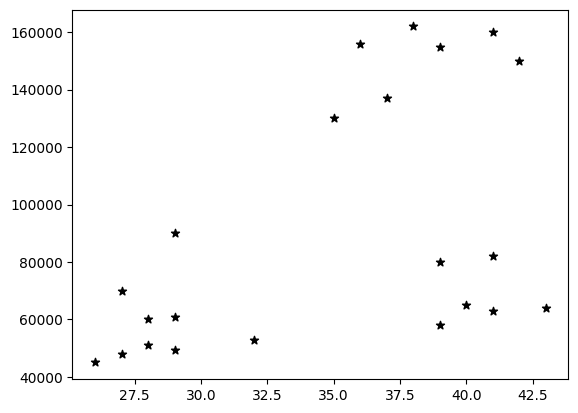

In [6]:
import matplotlib.pyplot as plt
plt.scatter(dataset.Age,dataset.Income,marker='*',color='black')

In [39]:
from sklearn.cluster import KMeans
df=dataset.drop(['Name'],axis='columns')
df.head()

scaler = MinMaxScaler()
scaler.fit(dataset[['Income']])
dataset['Income']=scaler.transform(dataset[['Income']])
scaler.fit(dataset[['Age']])
dataset['Age']=scaler.transform(dataset[['Age']])

In [40]:
model=KMeans(n_clusters=3)
y=model.fit_predict(df)
y

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [41]:
dataset.head()

,Name,Age,Income,Clustering
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [42]:
dataset['Clustering']=y

C:\Users\Hashir\AppData\Local\Temp\ipykernel_15956\3105217742.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


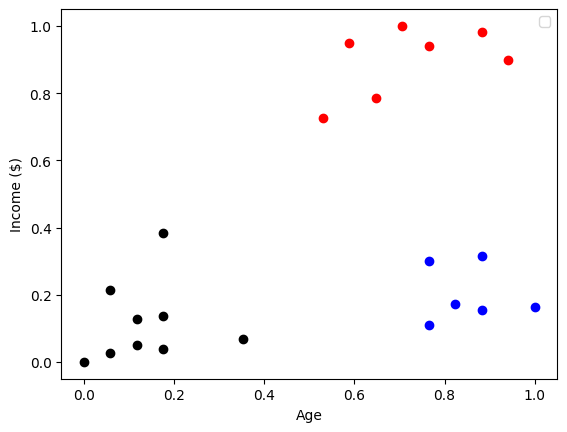

In [43]:
df0=dataset[dataset.Clustering==0]
df1=dataset[dataset.Clustering==1]
df2=dataset[dataset.Clustering==2]

plt.scatter(df0['Age'],df0['Income'],color='blue')
plt.scatter(df1['Age'],df1['Income'],color='red')
plt.scatter(df2['Age'],df2['Income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [46]:
dataset.head()

,Name,Age,Income,Clustering
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [56]:
error=[]
range1=range(1,10)
for i in range1:
    mode1=KMeans(n_clusters=i)
    mode1.fit(dataset[['Age','Income']])
    error.append(mode1.inertia_)

In [57]:
error

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3625079900797327,
 0.3115461388117861,
 0.25202295485063947,
 0.184278684552248,
 0.13706529523670863,
 0.10907864282306065]

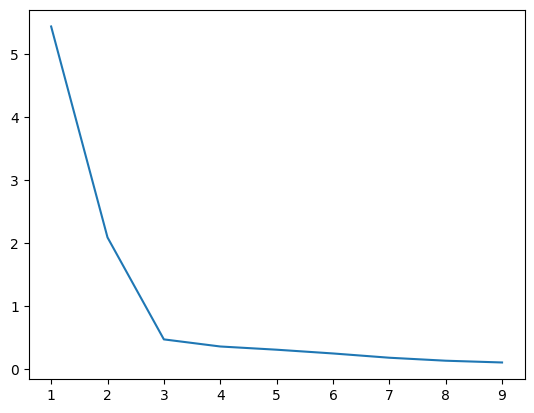

In [64]:
plt.plot(range1, error)